<a href="https://colab.research.google.com/github/JavierPachas/nn_examples/blob/main/dl_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Regression model in Keras**

Predicting sales from advertising budget of TV, Radio, Newspaper and digital (internet)

In [40]:
import pandas as pd

from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/JavierPachas/nn_examples/main/data/Advertising_2023.csv'

In [3]:
df = pd.read_csv(url, index_col = 0)

In [4]:
df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [6]:
df.shape

(1199, 5)

In [7]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

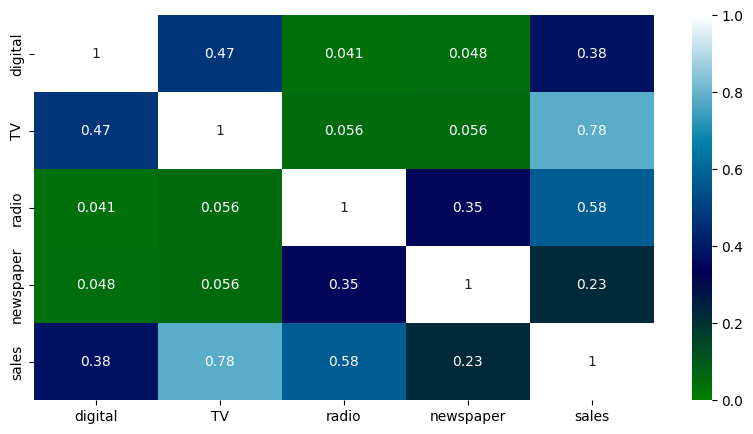

In [43]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, vmin = 0, vmax = 1, cmap ='ocean')

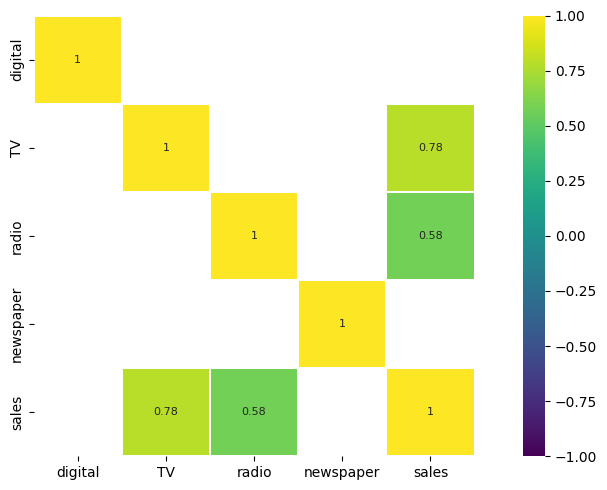

None

In [46]:
corr = df.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(corr[(corr >= 0.5)| (corr <= -0.7)],
            cmap ='viridis', vmax = 1, vmin =-1, linewidths = 0.1,
            annot = True, annot_kws = {'size': 8}, square = True)

plt.tight_layout()
display(plt.show())

<Axes: >

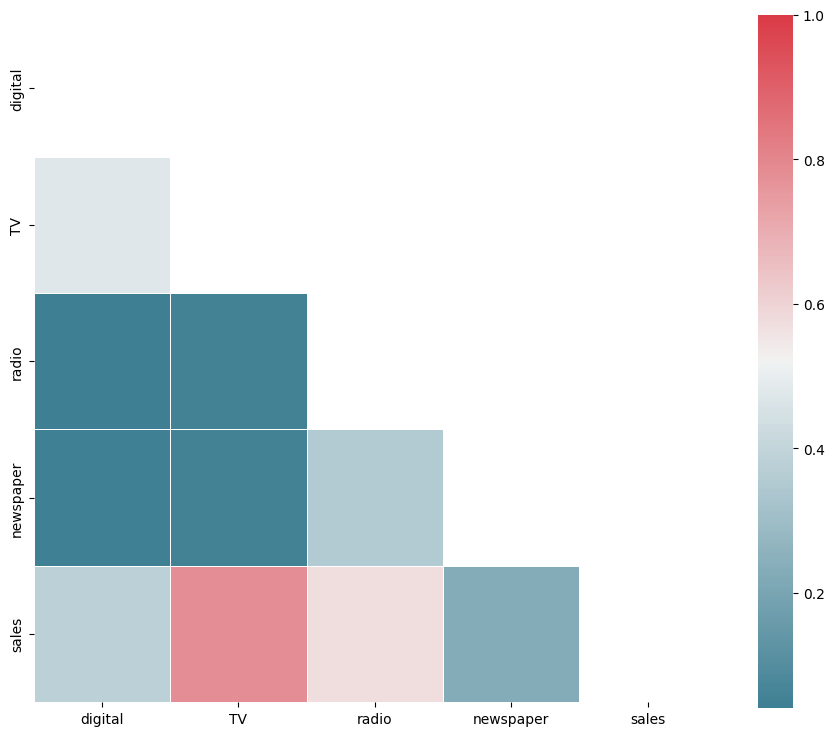

In [51]:
#Generating mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype = bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(df.corr(), mask = mask, cmap = cmap, vmax = 1, square = True, linewidths= 0.5, ax = ax)

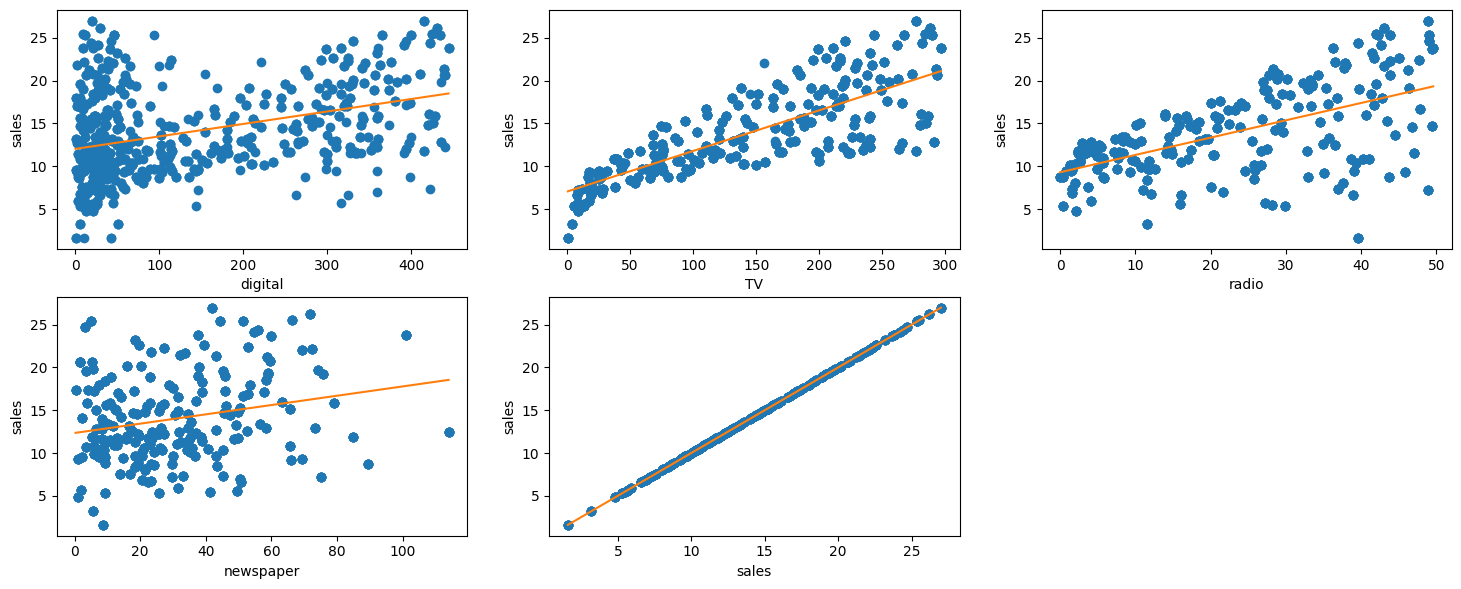

In [55]:
#Scatter plots
from scipy import stats
plt.figure(figsize = (18, 18))

for i, col in enumerate(df.columns[0:13]):
  plt.subplot(5,3, i+1)
  x = df[col]
  y = df['sales']
  plt.plot(x,y,'o')

  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)))
  plt.xlabel(col)
  plt.ylabel('sales')

*Data processing*

In [21]:
X = df[['digital','TV','radio','newspaper']]

In [22]:
y = df['sales']

In [23]:
normalized_feature = keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
#Modeling
model = Sequential()
model.add(Dense(4, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

In [59]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [60]:
#fitting model
sq_model = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)

Epoch 1/32
30/30 [==============================] - 1s 7ms/step - loss: 278.7451 - mse: 278.7451 - val_loss: 232.9960 - val_mse: 232.9960
Epoch 2/32
30/30 [==============================] - 0s 2ms/step - loss: 257.1435 - mse: 257.1435 - val_loss: 219.1554 - val_mse: 219.1554
Epoch 3/32
30/30 [==============================] - 0s 3ms/step - loss: 239.7757 - mse: 239.7757 - val_loss: 206.4957 - val_mse: 206.4957
Epoch 4/32
30/30 [==============================] - 0s 2ms/step - loss: 222.8850 - mse: 222.8850 - val_loss: 194.8164 - val_mse: 194.8164
Epoch 5/32
30/30 [==============================] - 0s 3ms/step - loss: 207.6362 - mse: 207.6362 - val_loss: 183.4793 - val_mse: 183.4793
Epoch 6/32
30/30 [==============================] - 0s 3ms/step - loss: 193.5573 - mse: 193.5573 - val_loss: 172.2549 - val_mse: 172.2549
Epoch 7/32
30/30 [==============================] - 0s 3ms/step - loss: 179.6783 - mse: 179.6783 - val_loss: 160.8494 - val_mse: 160.8494
Epoch 8/32
30/30 [================

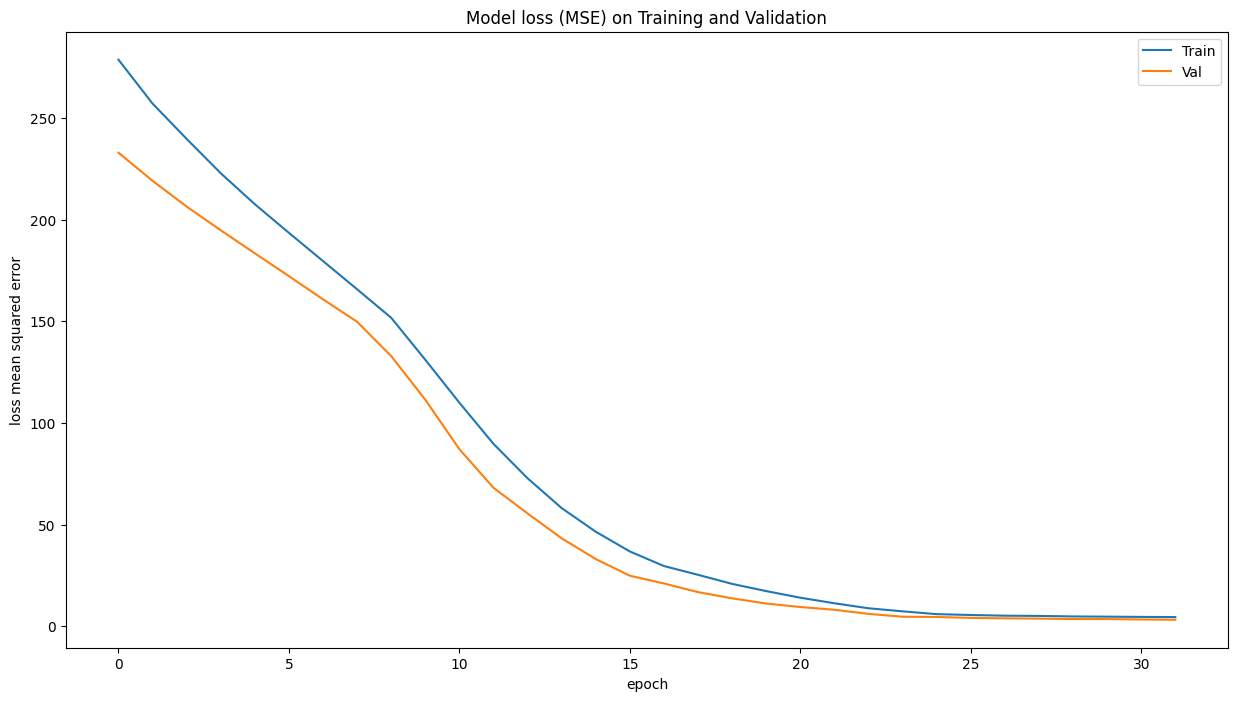

In [62]:
#evaluation
plt.figure(figsize = (15,8))
plt.plot(sq_model.history['loss'])
plt.plot(sq_model.history['val_loss'])
plt.title('Model loss (MSE) on Training and Validation')
plt.xlabel('epoch')
plt.ylabel('loss mean squared error')
plt.legend(['Train','Val'])
plt.show()

In [36]:
test_predictions = sq_model.model.predict(X_test).flatten()

df_true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns = ['True Value', 'Predicted Value'])
df_true_predicted.head()

8/8 [==============================] - 0s 2ms/step


,True Value,Predicted Value
0,11.7,12.713078
1,18.0,16.238964
2,23.8,21.533531
3,21.5,18.734512
4,23.8,18.133381


In [41]:
#model evaluation
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

30/30 [==============================] - 0s 875us/step
4.74838189557424


In [42]:
pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

8/8 [==============================] - 0s 1ms/step
4.64057593952287
